In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import root_pandas
import pandas as pd
import uproot
import numpy as np
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerBase
import os

Welcome to JupyROOT 6.18/00


In [3]:
def plot_xyprojection(xdata, ydata, hitcolor, hitlabel, hitsize=0.001, savebool=True, savename='projectionplot.pdf', xlimlow=0.0, xlimup=0.0, ylimlow=0.0, ylimup=0.0, legendloc=2):
    fig, ax = plt.subplots()
    x = xdata
    y = ydata
    
    circle1 = plt.Circle((0, 0), 44.85, color='black', fill=False, ls='--', lw=0.75, label='TPC cage')
    circle2 = plt.Circle((0, 0), 109.4, color='black', fill=False, ls='--', lw=0.75)
    
    tpchits = ax.scatter(x, y, marker='.', s = hitsize, color=hitcolor , label=hitlabel)
    ax.set_xlabel('$x$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$y$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    if xlimlow and xlimup:
        ax.set_xlim(xlimlow, xlimup)
    if ylimlow and ylimup:
        ax.set_ylim(ylimlow, ylimup)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccircle = ax.add_artist(circle1)
    ax.add_artist(circle2)
    
    fig.set_size_inches(10, 10)
    plt.title('Readout plane projection', fontsize=25)
    lgnd = plt.legend(handles=[tpchits, tpccircle],loc=legendloc, prop={'size':15})
    lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

In [4]:
def plot_sideprojection(zdata, sidedata, sidename,hitcolor, hitlabel, hitsize=0.001, savebool=True, savename='projectionplot.pdf', zlimlow=0.0, zlimup=0.0, sidelimlow=0.0, sidelimup=0.0):
    fig, ax = plt.subplots()
    x = zdata
    y = sidedata
    
    rect1 = plt.Rectangle((-241.69,-109.4), 725.07, 218.8 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--', label='TPC cage')
    plt.vlines(x=0, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
    plt.vlines(x=241.69, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
    
    tpchits = ax.scatter(x, y, marker='.', s = hitsize, color=hitcolor , label=hitlabel)
    ax.set_xlabel('$z$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$'+sidename+'$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    if zlimlow and zlimup:
        ax.set_xlim(zlimlow, zlimup)
    if sidelimlow and sidelimup:
        ax.set_ylim(sidelimlow, sidelimup)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccage = ax.add_artist(rect1)
    
    fig.set_size_inches(15, 15)
    plt.title('Side View of TPC Volume', fontsize=25)
    # lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
    # lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

# Reading TPCeventoverlay.root

In [5]:
TPC = root_pandas.read_root('~/tpcbasf2/tpc/examples/eventoverlay/dataTPC/TPCEventOverlay696686863.root', 'tree')
TPC

,x,y,z,eventID,eventIndex,trackID,pdg
0,3.210880,44.746375,115.245200,1,43,12,211
1,3.070951,44.823733,115.070009,1,43,12,211
2,3.163374,44.799451,114.736962,1,43,12,211
3,3.137874,44.908453,115.152055,1,43,12,211
4,3.287246,44.843614,115.455707,1,43,12,211
5,3.043329,44.837706,115.167051,1,43,12,211
6,3.222400,44.854781,115.461915,1,43,12,211
7,3.077737,44.794626,115.611563,1,43,12,211
8,3.264741,44.768789,115.560472,1,43,12,211
9,3.089533,44.748386,115.767890,1,43,12,211


In [6]:
TPC.loc[TPC["eventID"] == 1, ["x"]]

,x
0,3.210880
1,3.070951
2,3.163374
3,3.137874
4,3.287246
5,3.043329
6,3.222400
7,3.077737
8,3.264741
9,3.089533


In [7]:
dataTest = TPC[TPC['eventID']==1]
dataTest

,x,y,z,eventID,eventIndex,trackID,pdg
0,3.210880,44.746375,115.245200,1,43,12,211
1,3.070951,44.823733,115.070009,1,43,12,211
2,3.163374,44.799451,114.736962,1,43,12,211
3,3.137874,44.908453,115.152055,1,43,12,211
4,3.287246,44.843614,115.455707,1,43,12,211
5,3.043329,44.837706,115.167051,1,43,12,211
6,3.222400,44.854781,115.461915,1,43,12,211
7,3.077737,44.794626,115.611563,1,43,12,211
8,3.264741,44.768789,115.560472,1,43,12,211
9,3.089533,44.748386,115.767890,1,43,12,211


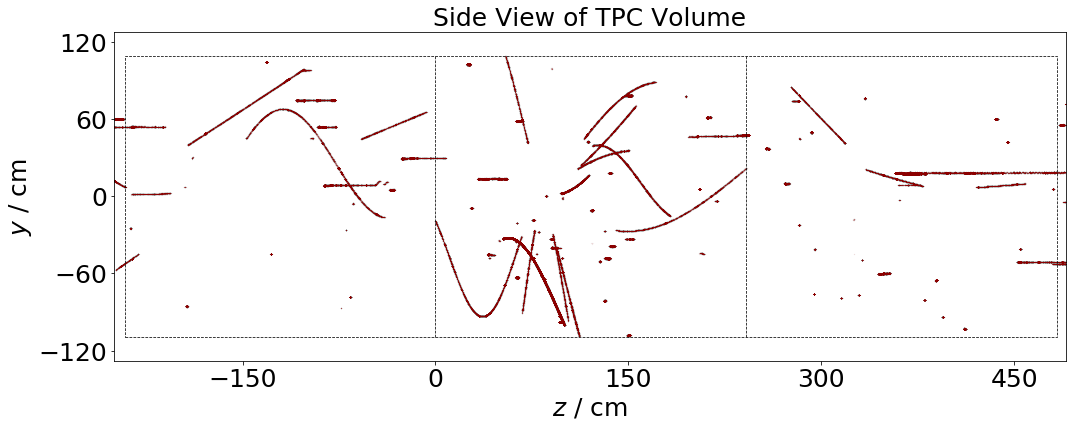

In [9]:
plot_sideprojection(TPC['z'], TPC['y'], sidename='y', hitcolor='darkred', hitlabel='TPCDigits', savebool=False, savename='UpsisForPeter.pdf', sidelimlow=-128, sidelimup=128, zlimlow=-250, zlimup=490)

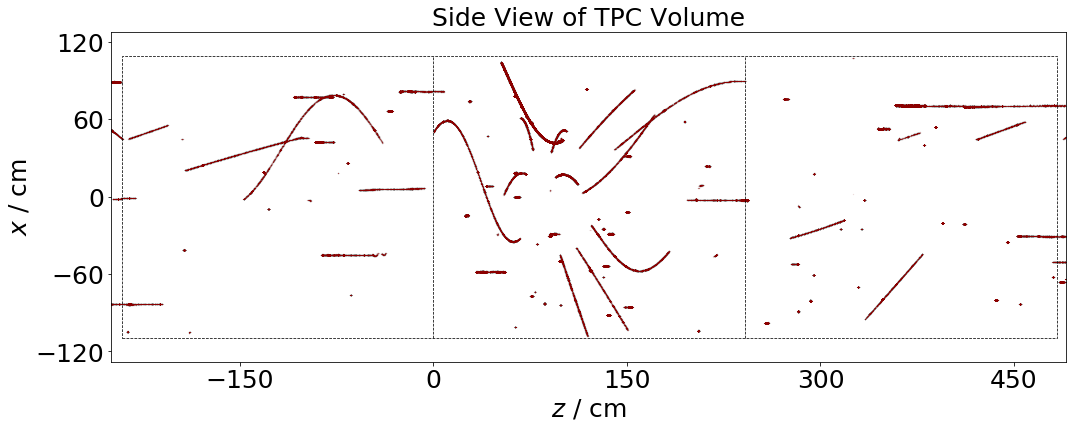

In [10]:
plot_sideprojection(TPC['z'], TPC['x'], sidename='x', hitcolor='darkred', hitlabel='TPCDigits', savebool=False, savename='UpsisForPeter.pdf', sidelimlow=-128, sidelimup=128, zlimlow=-250, zlimup=490)

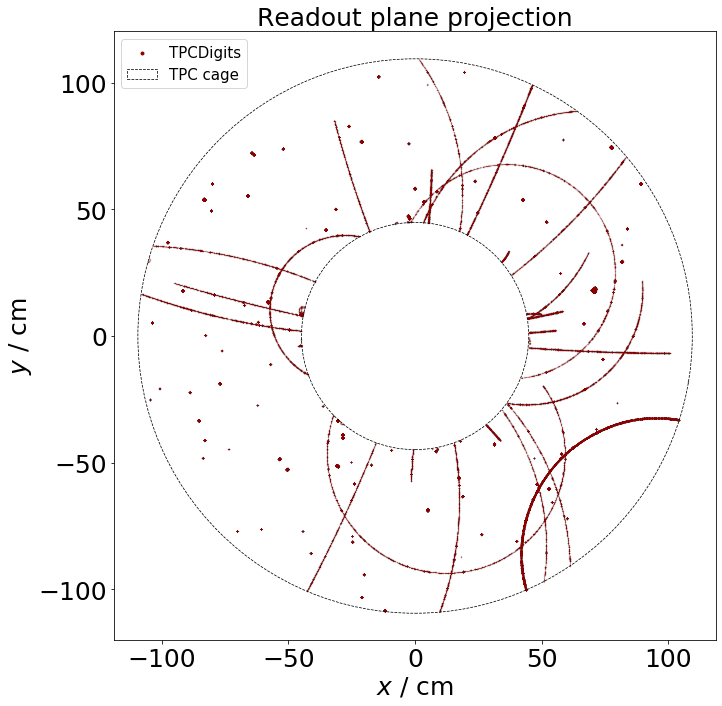

In [11]:
plot_xyprojection(TPC['x'], TPC['y'], hitcolor='darkred', hitlabel='TPCDigits', savebool=False, savename='UpsisForPeter.pdf')

## Defining Colormaps

In [8]:
cdict1 = {'red':  (#(0.0, 0.729, 0.729),
                   #(0.04, 0.682, 0.682),
                   #(0.12, 0.627, 0.627),
                   (0.00, 0.584, 0.584),
                   (0.10, 0.545, 0.545),
                   (0.20, 0.502, 0.502),
                   (0.30, 0.475, 0.475),
                   (0.40, 0.435, 0.435),
                   (0.50, 0.400, 0.400),
                   (0.60, 0.373, 0.373),
                   (0.70, 0.306, 0.306),
                   (0.80, 0.224, 0.224),
                   (0.90, 0.192, 0.192),
                   (1.00, 0.165, 0.165)),

         'green': (#(0.00, 0.867, 0.867),
                   #(0.04, 0.835, 0.835),
                   #(0.12, 0.800, 0.800),
                   (0.00, 0.765, 0.765),
                   (0.10, 0.729, 0.729),
                   (0.20, 0.694, 0.694),
                   (0.30, 0.659, 0.659),
                   (0.40, 0.627, 0.627),
                   (0.50, 0.596, 0.596),
                   (0.60, 0.549, 0.549),
                   (0.70, 0.498, 0.498),
                   (0.80, 0.404, 0.404),
                   (0.90, 0.373, 0.373),
                   (1.0 , 0.341, 0.341)),

         'blue':  (#(0.00, 0.949, 0.949),
                   #(0.04, 0.933, 0.933),
                   #(0.12, 0.914, 0.914),
                   (0.00, 0.894, 0.894),
                   (0.10, 0.871, 0.871),
                   (0.20, 0.843, 0.843),
                   (0.30, 0.808, 0.808),
                   (0.40, 0.788, 0.788),
                   (0.50, 0.765, 0.765),
                   (0.60, 0.729, 0.729),
                   (0.70, 0.686, 0.686),
                   (0.80, 0.588, 0.588),
                   (0.90, 0.553, 0.553),
                   (1.00, 0.522, 0.522))
        }
blue_tableau = LinearSegmentedColormap('TableauBlue', cdict1)


In [9]:
cdict2 = {'red':  (#(0.0, 0.729, 0.729),
                   #(0.04, 0.682, 0.682),
                   #(0.12, 0.627, 0.627),
                   (0.00, 0.906, 0.906),
                   (0.10, 0.867, 0.867),
                   (0.20, 0.831, 0.831),
                   (0.30, 0.792, 0.792),
                   (0.40, 0.753, 0.753),
                   (0.50, 0.714, 0.714),
                   (0.60, 0.663, 0.663),
                   (0.70, 0.608, 0.608),
                   (0.80, 0.561, 0.561),
                   (0.90, 0.522, 0.522),
                   (1.00, 0.486, 0.486)),

         'green': (#(0.00, 0.867, 0.867),
                   #(0.04, 0.835, 0.835),
                   #(0.12, 0.800, 0.800),
                   (0.00, 0.733, 0.733),
                   (0.10, 0.686, 0.686),
                   (0.20, 0.639, 0.639),
                   (0.30, 0.592, 0.592),
                   (0.40, 0.545, 0.545),
                   (0.50, 0.498, 0.498),
                   (0.60, 0.459, 0.459),
                   (0.70, 0.420, 0.420),
                   (0.80, 0.380, 0.380),
                   (0.90, 0.341, 0.341),
                   (1.0 , 0.302, 0.302)),

         'blue':  (#(0.00, 0.949, 0.949),
                   #(0.04, 0.933, 0.933),
                   #(0.12, 0.914, 0.914),
                   (0.00, 0.859, 0.859),
                   (0.10, 0.812, 0.812),
                   (0.20, 0.765, 0.765),
                   (0.30, 0.725, 0.725),
                   (0.40, 0.682, 0.682),
                   (0.50, 0.643, 0.643),
                   (0.60, 0.616, 0.616),
                   (0.70, 0.592, 0.592),
                   (0.80, 0.545, 0.545),
                   (0.90, 0.518, 0.518),
                   (1.00, 0.475, 0.475))
        }
purple_tableau = LinearSegmentedColormap('TableauPurple', cdict2)


In [10]:
cdict3 = {'red':  (#(0.0, 0.729, 0.729),
                   #(0.04, 0.682, 0.682),
                   #(0.12, 0.627, 0.627),
                   (0.00, 0.961, 0.961),
                   (0.10, 0.969, 0.969),
                   (0.20, 0.949, 0.949),
                   (0.30, 0.898, 0.898),
                   (0.40, 0.863, 0.863),
                   (0.50, 0.835, 0.835),
                   (0.60, 0.808, 0.808),
                   (0.70, 0.769, 0.769),
                   (0.80, 0.725, 0.725),
                   (0.90, 0.671, 0.671),
                   (1.00, 0.612, 0.612)),

         'green': (#(0.00, 0.867, 0.867),
                   #(0.04, 0.835, 0.835),
                   #(0.12, 0.800, 0.800),
                   (0.00, 0.647, 0.647),
                   (0.10, 0.541, 0.541),
                   (0.20, 0.439, 0.439),
                   (0.30, 0.353, 0.353),
                   (0.40, 0.271, 0.271),
                   (0.50, 0.184, 0.184),
                   (0.60, 0.114, 0.114),
                   (0.70, 0.106, 0.106),
                   (0.80, 0.098, 0.098),
                   (0.90, 0.086, 0.086),
                   (1.0 , 0.078, 0.078)),

         'blue':  (#(0.00, 0.949, 0.949),
                   #(0.04, 0.933, 0.933),
                   #(0.12, 0.914, 0.914),
                   (0.00, 0.612, 0.612),
                   (0.10, 0.490, 0.490),
                   (0.20, 0.380, 0.380),
                   (0.30, 0.282, 0.282),
                   (0.40, 0.208, 0.208),
                   (0.50, 0.145, 0.145),
                   (0.60, 0.102, 0.102),
                   (0.70, 0.090, 0.090),
                   (0.80, 0.102, 0.102),
                   (0.90, 0.122, 0.122),
                   (1.00, 0.137, 0.137))
        }
red_tableau = LinearSegmentedColormap('TableauRed', cdict3)


In [11]:
cdict4 = {'red':  ((0.00, 0.624, 0.624),
                   (0.20, 0.557, 0.557),
                   (0.40, 0.494, 0.494),
                   (0.60, 0.431, 0.431),
                   (0.80, 0.369, 0.369),
                   (0.99, 0.314, 0.314),
                   #(0.60, 0.259, 0.259),
                   #(0.70, 0.208, 0.208),
                   #(0.80, 0.161, 0.161),
                   #(0.90, 0.118, 0.118),
                   (1.00, 0.000, 0.000)),

         'green': ((0.00, 0.624, 0.624),
                   (0.20, 0.557, 0.557),
                   (0.40, 0.494, 0.494),
                   (0.60, 0.431, 0.431),
                   (0.80, 0.369, 0.369),
                   (0.99, 0.314, 0.314),
                   #(0.60, 0.259, 0.259),
                   #(0.70, 0.208, 0.208),
                   #(0.80, 0.161, 0.161),
                   #(0.90, 0.118, 0.118),
                   (1.0 , 0.000, 0.000)),

         'blue':  ((0.00, 0.624, 0.624),
                   (0.20, 0.557, 0.557),
                   (0.40, 0.494, 0.494),
                   (0.60, 0.431, 0.431),
                   (0.80, 0.369, 0.369),
                   (0.99, 0.314, 0.314),
                   #(0.60, 0.259, 0.259),
                   #(0.70, 0.208, 0.208),
                   #(0.80, 0.161, 0.161),
                   #(0.90, 0.118, 0.118),
                   (1.00, 0.000, 0.000))
        }
grey_tableau = LinearSegmentedColormap('TableauGrey', cdict4)

## Plotting Functions

In [12]:
class HandlerColormap(HandlerBase):
    def __init__(self, cmap, num_stripes=8, **kw):
        HandlerBase.__init__(self, **kw)
        self.cmap = cmap
        self.num_stripes = num_stripes
    def create_artists(self, legend, orig_handle, 
                       xdescent, ydescent, width, height, fontsize, trans):
        stripes = []
        for i in range(self.num_stripes):
            s = Rectangle([xdescent + i * width / self.num_stripes, ydescent], 
                          width / self.num_stripes, 
                          height, 
                          fc=self.cmap((2 * i + 1) / (2 * self.num_stripes)), 
                          transform=trans)
            stripes.append(s)
        return stripes

In [13]:
def eventplot(dataFrame, eventtype):
    
    fig, ax = plt.subplots()
    x = dataFrame['z']
    y = dataFrame['y']
    eventtypenames = ['All', r'$\Upsilon$(4S)', 'Bhabha', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$']
    colormaps=[grey_tableau, blue_tableau, red_tableau, red_tableau, red_tableau, purple_tableau, purple_tableau, purple_tableau, purple_tableau, red_tableau, red_tableau]
    eventIndex=dataFrame['eventIndex']
    maxIndex = eventIndex.max()
    upsiindex = eventIndex
    if eventtype == 1:
        upsiindex = eventIndex/(dataFrame['eventIndex'].iloc[0])
        upsiindex = 1- (upsiindex % 1)
    colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]
    
    rect1 = plt.Rectangle((-251.69,-109.4), 745.07, 218.8 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--', label='TPC cage')
    plt.vlines(x=0, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
    plt.vlines(x=242.69, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
    #plt.vlines(x=-159.07, ymin=-109.4, ymax=109.4, lw=0.75, ls=':', color='blue')
    #plt.vlines(x=242.69+83.62, ymin=-109.4, ymax=109.4, lw=0.75, ls=':', color='blue')
    
    if eventtype == 0:
        for i in range(1,12):
            dataTrue = dataFrame[dataFrame['eventID']==i]
            x = dataTrue["z"]
            y = dataTrue["y"]
            eventIndex=dataTrue["eventIndex"]
            maxIndex = eventIndex.max()
            if i==1:
                upsiindex = eventIndex/(dataFrame['eventIndex'].iloc[0])
                upsiindex = 1- (upsiindex % 1)
            colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]
    
            tpchits = ax.scatter(x, y, marker='.', s=0.001, c=colors[i-1], cmap=colormaps[i-1], vmin=0.0, vmax=1.0)

    else:
        tpchits = ax.scatter(x, y, marker='.', s = 0.001, c=colors[eventtype-1], cmap=colormaps[eventtype-1], vmin=0.0, vmax=1.0)
        
    ax.set_xlabel('$z$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(7))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_xlim(-250, 490)

    ax.set_ylabel('$y$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(30))
    ax.set_ylim(-128, 128)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccage = ax.add_artist(rect1)
    
    cmaps = [grey_tableau, blue_tableau, purple_tableau, red_tableau]
    cmap_labels = [r"$\Upsilon$(4S)","Bhabhas", r"$q\bar{q}$ continuum", "QED"]
    # create proxy artists as handles:
    cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
    handler_map = dict(zip(cmap_handles, 
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
    #cmap_labels.append("Upsilon(4S)")
    #cmap_handels.append(tpcsimhits)
    
    plt.legend(handles=cmap_handles, 
           labels=cmap_labels, 
           handler_map=handler_map,
           bbox_to_anchor=(1.23, 1),
           fontsize=15)
        
    fig.set_size_inches(15, 5.5)
    plt.title(eventtypenames[eventtype]+' events', fontsize=25)
    # lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
    # lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    #plt.savefig('TPCvolumes.pdf')

    plt.show()
    plt.close()
    return fig

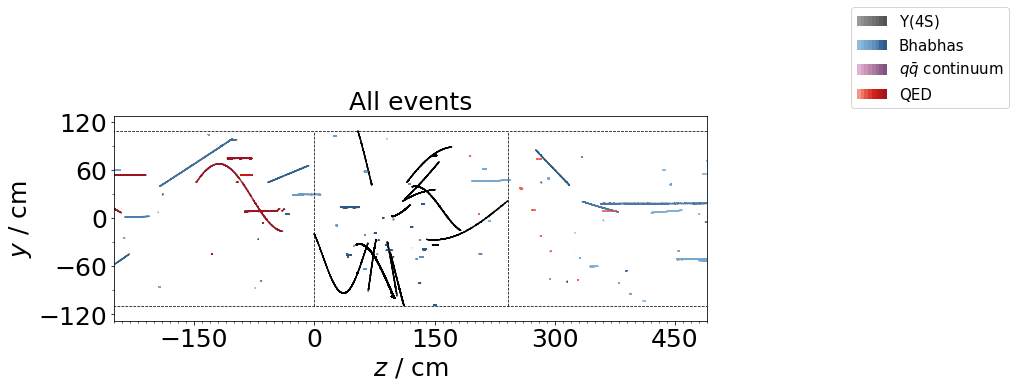

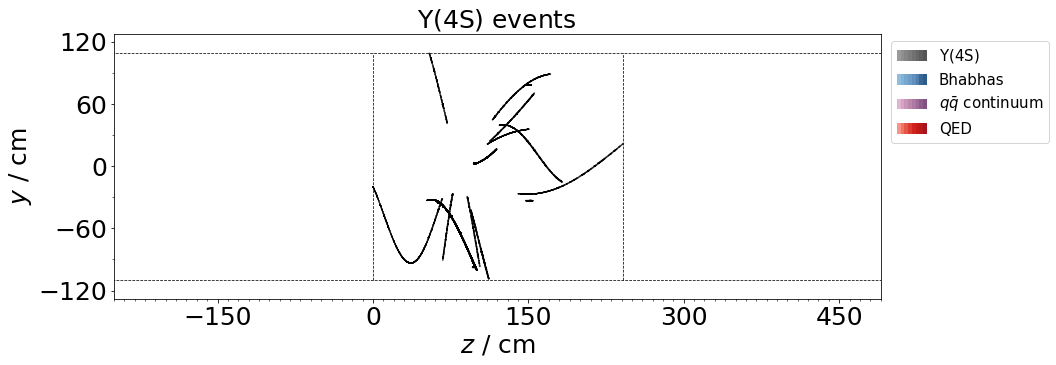

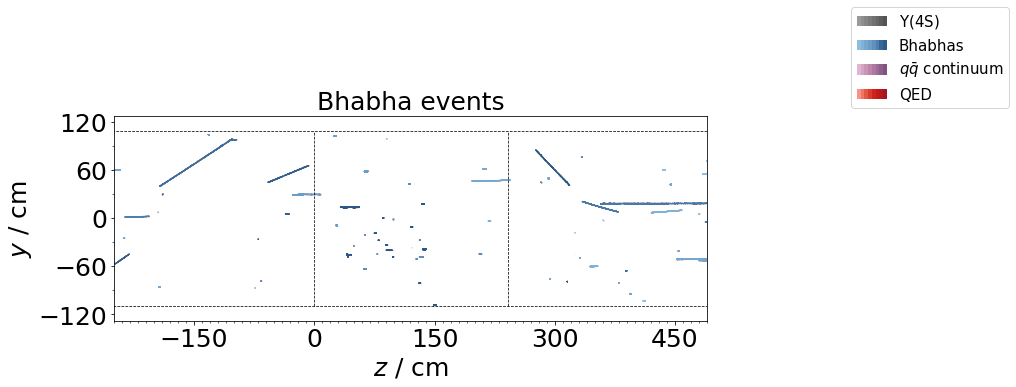

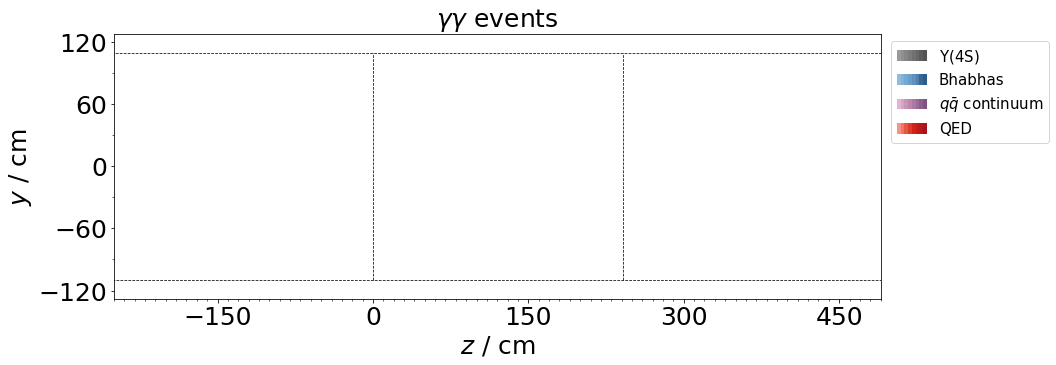

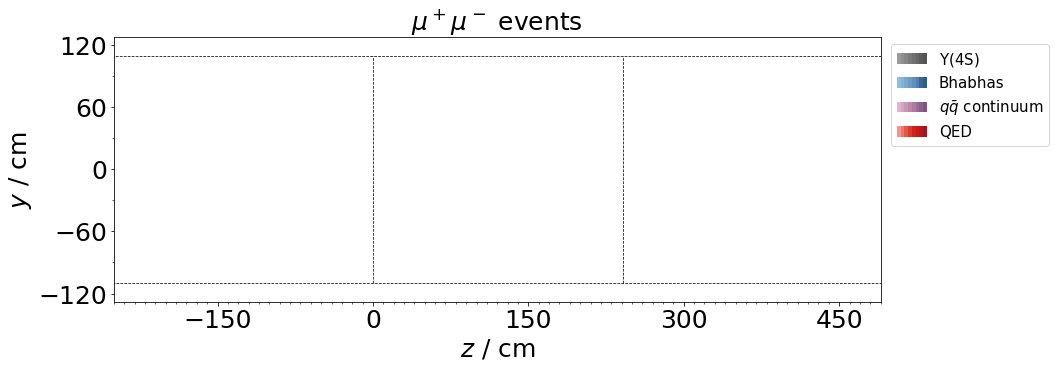

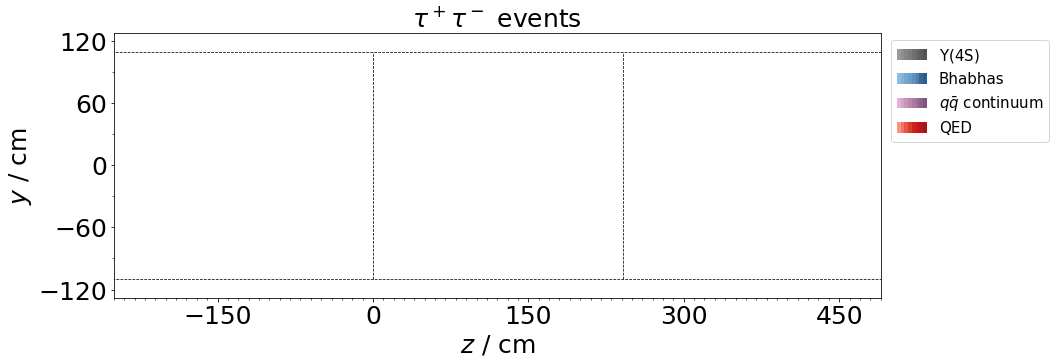

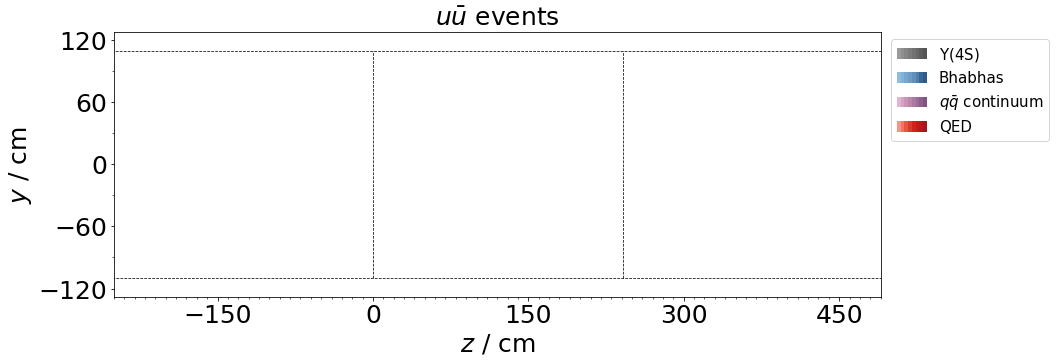

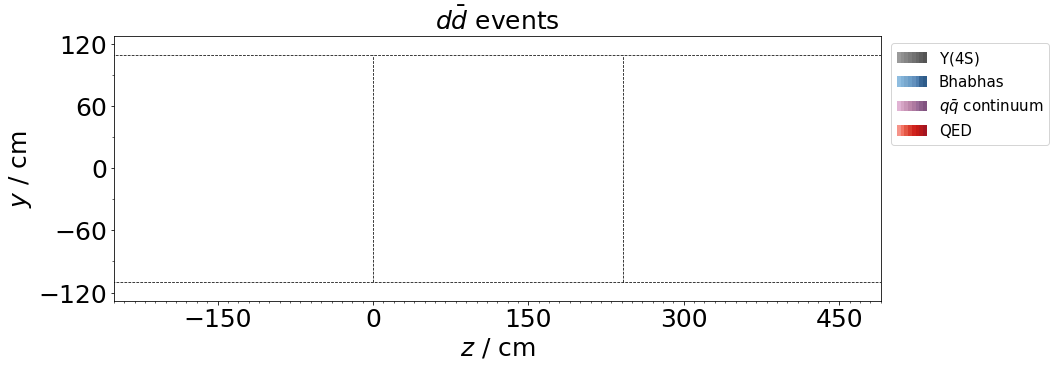

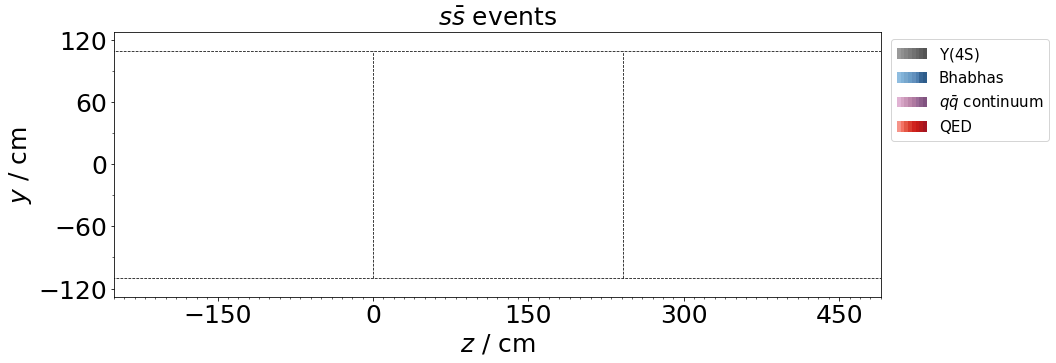

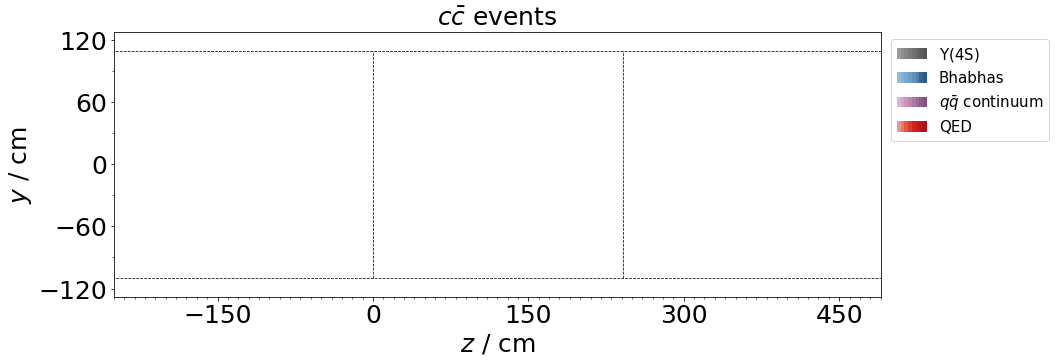

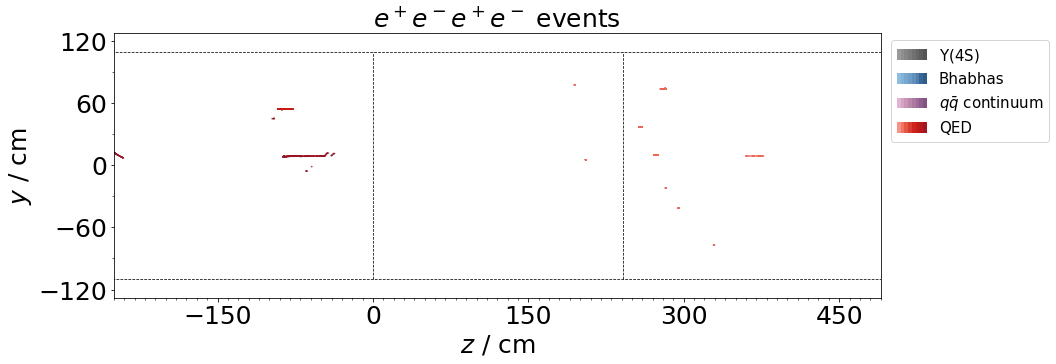

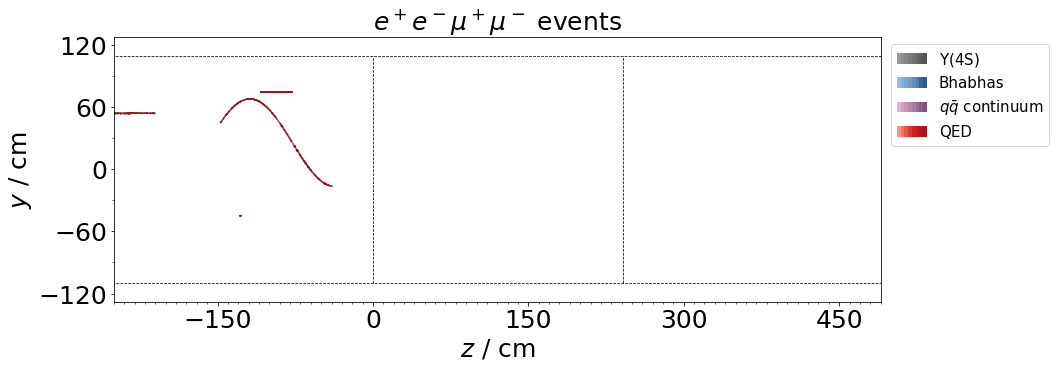

In [17]:
with PdfPages('TPCOverlay3825921711.pdf') as pdf:
    for i in range(12):
        if i == 0:
            eventtypedata = TPC
            #continue
        else:
            eventtypedata = TPC[TPC['eventID']==i]
        
        fig = eventplot(eventtypedata, i)
        pdf.savefig(fig)
        
    

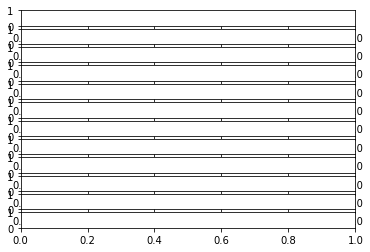

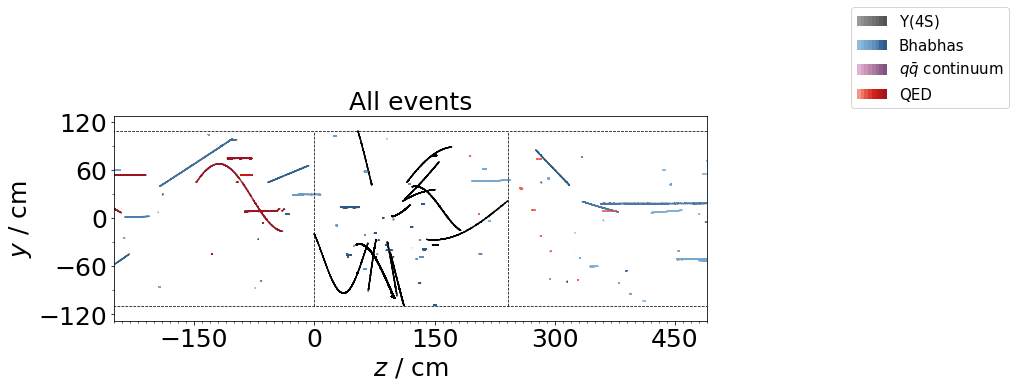

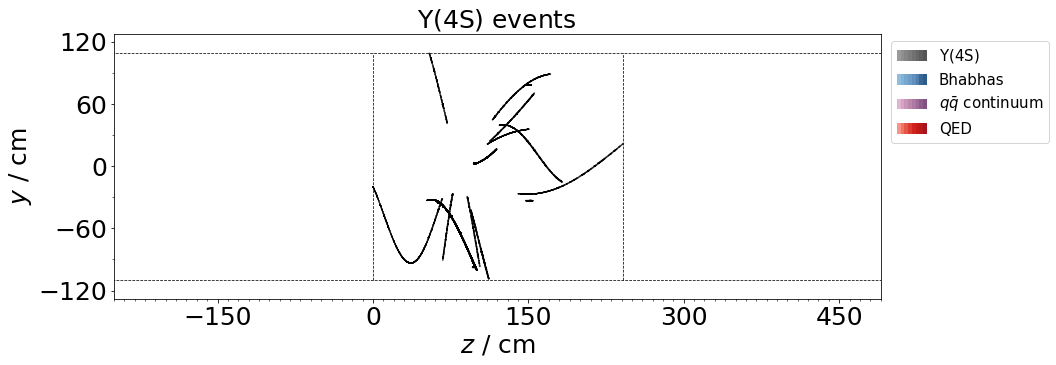

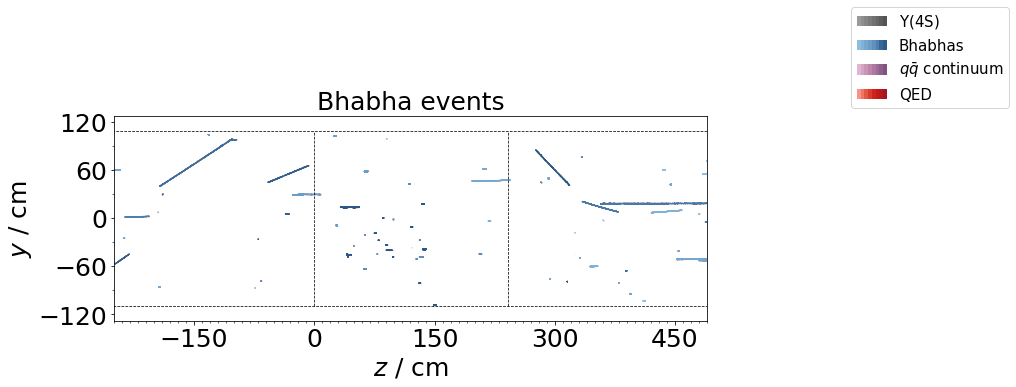

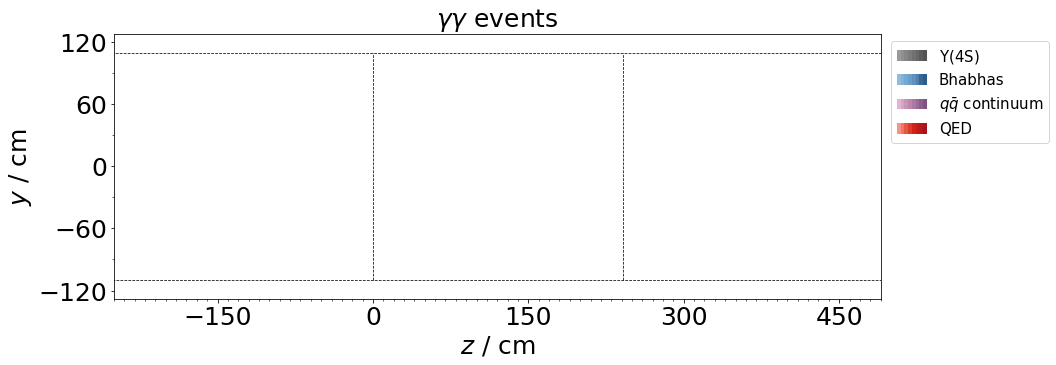

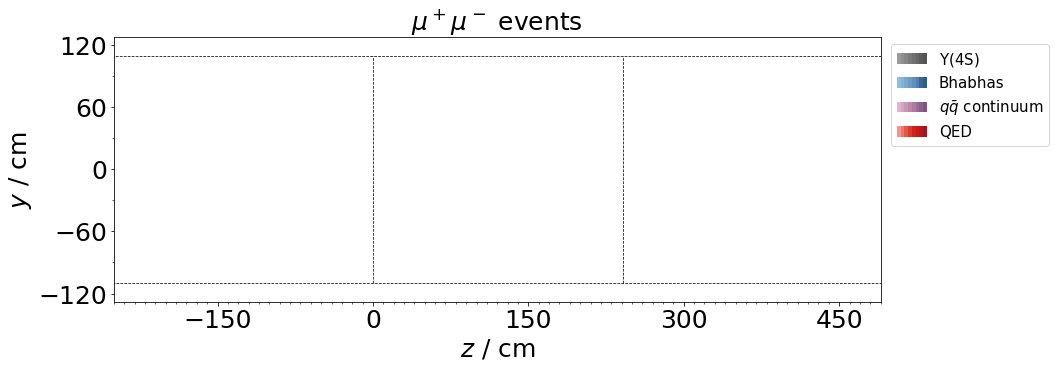

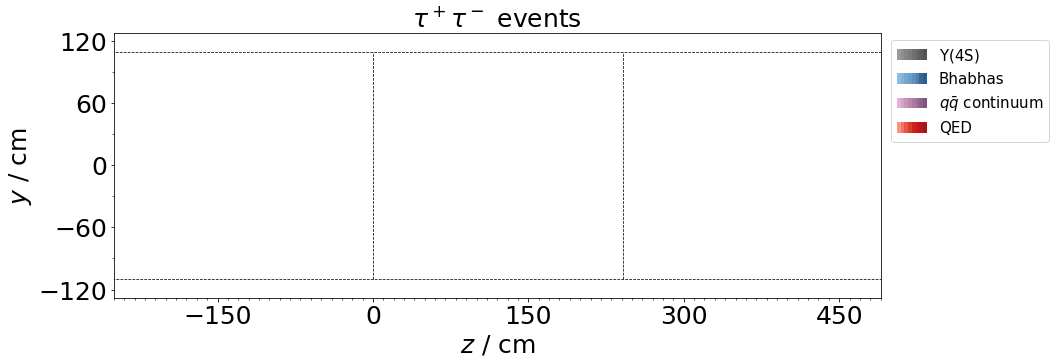

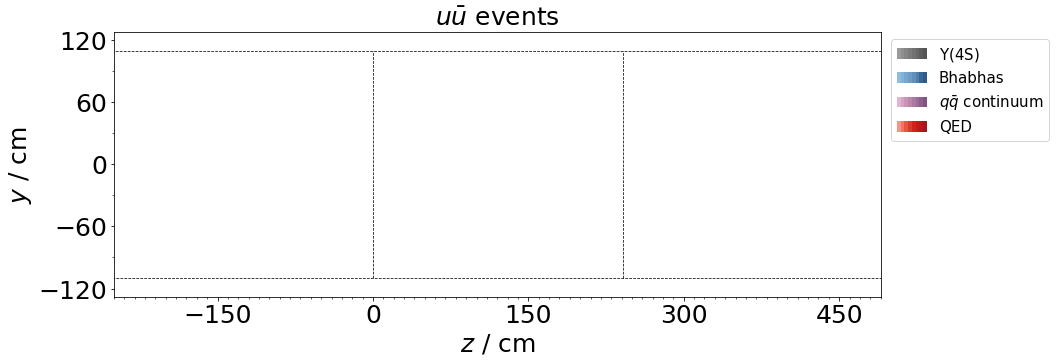

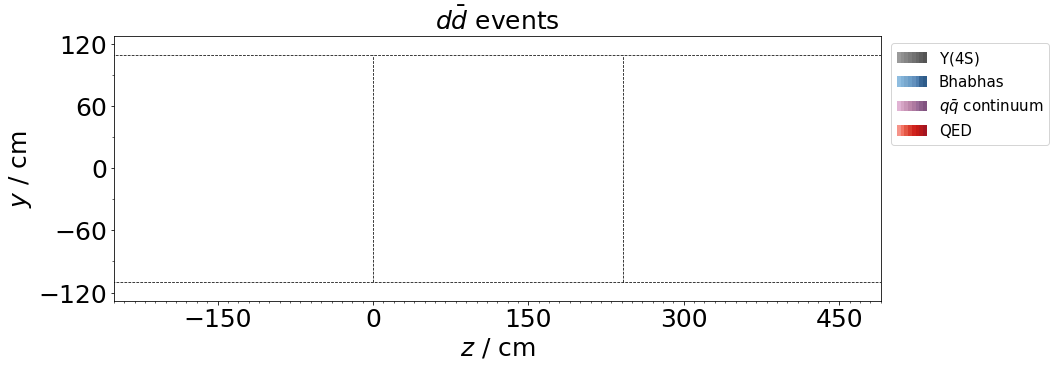

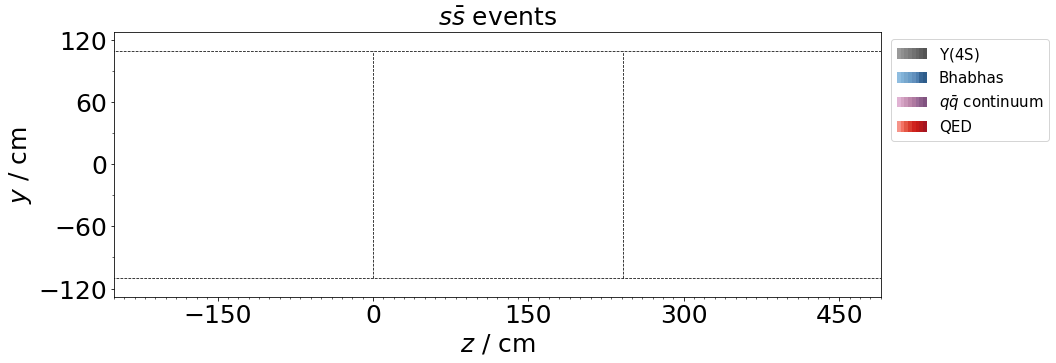

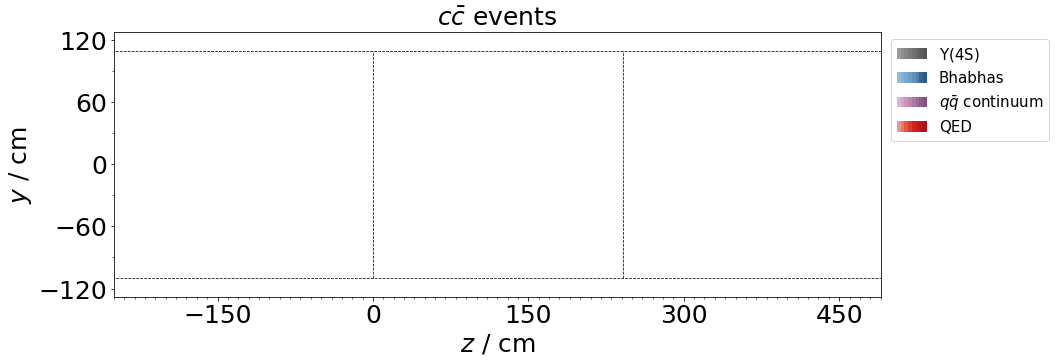

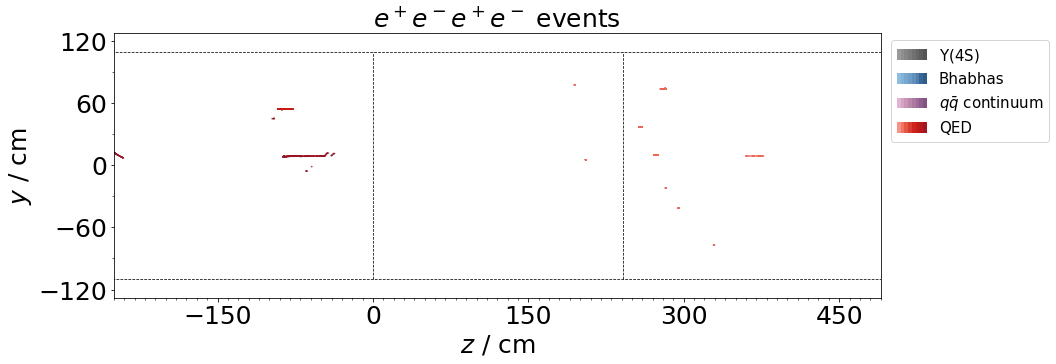

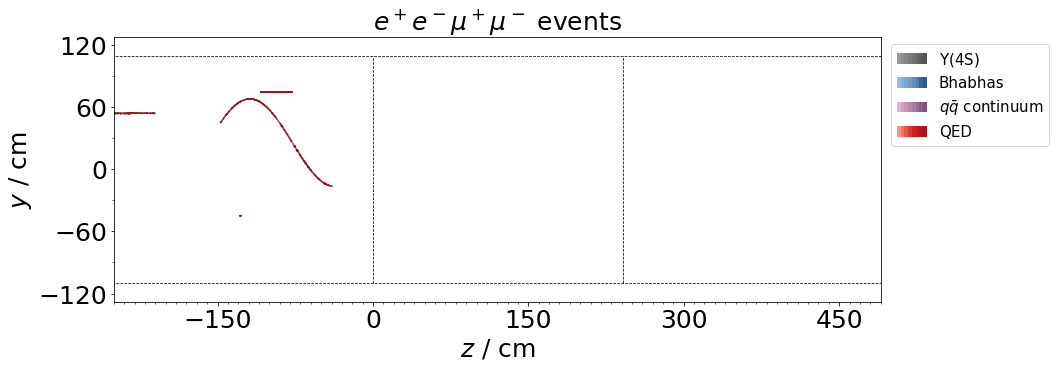

In [18]:
nrows = 12
fig, axes = plt.subplots(nrows, 1)
i = 0
for row in axes:
        if i == 0:
            eventtypedata = TPC
            #continue
        else:
            eventtypedata = TPC[TPC['eventID']==i]
        eventplot(eventtypedata, i)
        i+=1
        #plt.show()

In [22]:
TPCvols = root_pandas.read_root('~/tpcbasf2/tpc/examples/eventoverlay/dataTPC/NewStruct739833211.root', 'tree')
TPCvols

,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
0,6.397101,-44.448826,78.335733,10173.471842,6.39,-44.45,78.25125,10162.5,1,21,12,211,True
1,6.447634,-44.444734,78.047875,10136.087712,6.45,-44.45,78.05875,10137.5,1,21,12,211,True
2,6.416894,-44.410469,78.395668,10181.255528,6.41,-44.41,78.44375,10187.5,1,21,12,211,True
3,6.391278,-44.592806,78.247014,10161.949925,6.39,-44.59,78.25125,10162.5,1,21,12,211,True
4,6.408208,-44.500840,77.712789,10092.570002,6.41,-44.51,77.67375,10087.5,1,21,12,211,True
5,6.370708,-44.640069,78.186245,10154.057730,6.37,-44.65,78.25125,10162.5,1,21,12,211,True
6,6.387121,-44.624661,78.149812,10149.326177,6.39,-44.63,78.05875,10137.5,1,21,12,211,True
7,6.410349,-44.673935,78.258092,10163.388609,6.41,-44.67,78.25125,10162.5,1,21,12,211,True
8,6.351741,-44.775211,78.033542,10134.226296,6.35,-44.77,78.05875,10137.5,1,21,12,211,True
9,6.344223,-44.730524,78.100189,10142.881638,6.35,-44.73,78.05875,10137.5,1,21,12,211,True


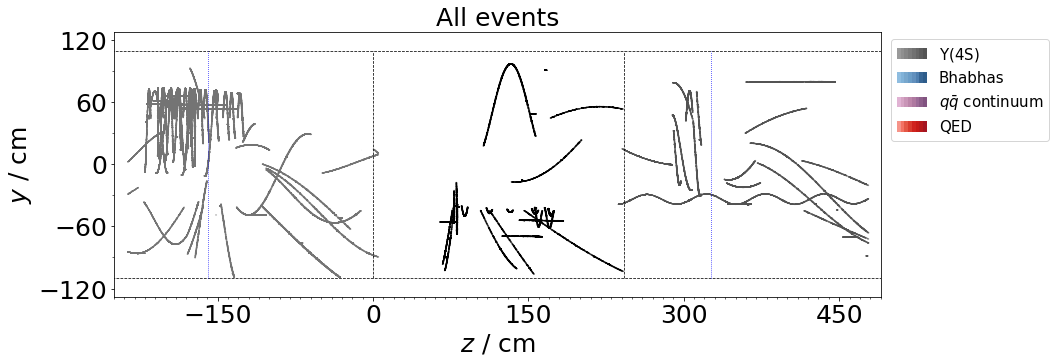

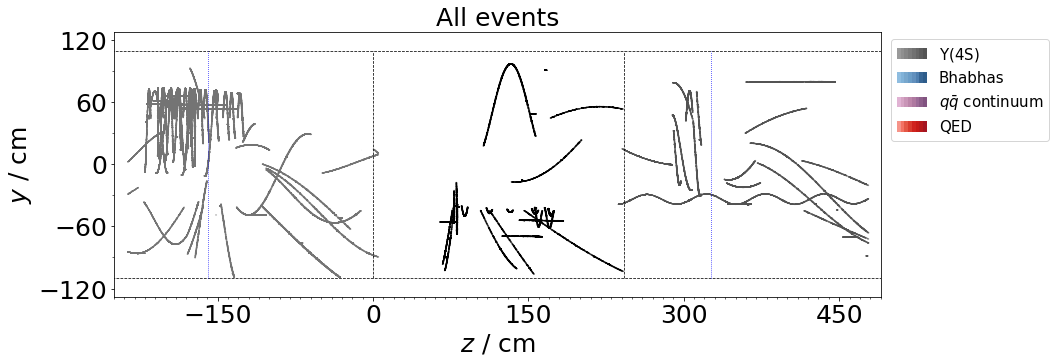

In [35]:
eventplot(TPCvols, 0)
#plt.savefig('TPCvolumes.png')

## Plotting single event type

In [19]:
def bhabhaplot(dataFrame, eventindex):
    fig, ax = plt.subplots()
    x = dataFrame['z']
    y = dataFrame['y']
    # eventtypenames = ['All', 'Upsilon(4S)', 'Bhabha', 'gamma gamma', 'mu+mu-', 'tau+tau-', 'u ubar', 'd dbar', 's sbar', 'c cbar', 'e+e-e+e-', 'e+e-mu+mu-']
    
    rect1 = plt.Rectangle((-241.69,-109.4), 725.07, 218.8 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--', label='TPC cage')
    plt.vlines(x=0, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
    plt.vlines(x=241.69, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
    
    tpchits = ax.scatter(x, y, marker='.', s = 0.001, color='black')
    
    ax.set_xlabel('$z$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(7))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_xlim(-250, 490)

    ax.set_ylabel('$y$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(30))
    ax.set_ylim(-128, 128)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccage = ax.add_artist(rect1)
    
    fig.set_size_inches(15, 5.5)
    plt.title('Bhabha event '+str(eventindex), fontsize=25)
    # lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
    # lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()

    plt.show()
    plt.close()
    return fig

In [20]:
Bhabhas = TPC[TPC['eventID']==2]
Bhabhas

,x,y,z,eventID,eventIndex,trackID,pdg
188920,-44.425139,-77.055664,-298.184319,2,5439,325,11
188921,-44.335768,-77.127353,-298.475676,2,5439,325,11
188922,-44.379094,-77.110578,-298.289245,2,5439,325,11
188923,-44.434830,-77.069325,-298.139056,2,5439,325,11
188924,-44.347739,-77.060623,-297.755915,2,5439,325,11
...,...,...,...,...,...,...,...
483761,-0.235691,58.368058,63.348681,2,7605,7304,11
483762,-0.200064,58.393239,63.722283,2,7605,7304,11
483763,-0.157237,58.375651,63.480534,2,7605,7304,11
483764,-0.193129,58.459806,63.175651,2,7605,7304,11


In [21]:
bhabhaindices = Bhabhas.eventIndex.unique().tolist()
bhabhaindices

[5439,
 15063,
 5699,
 6120,
 15960,
 12596,
 10567,
 17273,
 12163,
 10186,
 949,
 10550,
 5152,
 3456,
 2612,
 13314,
 16713,
 13321,
 7605]

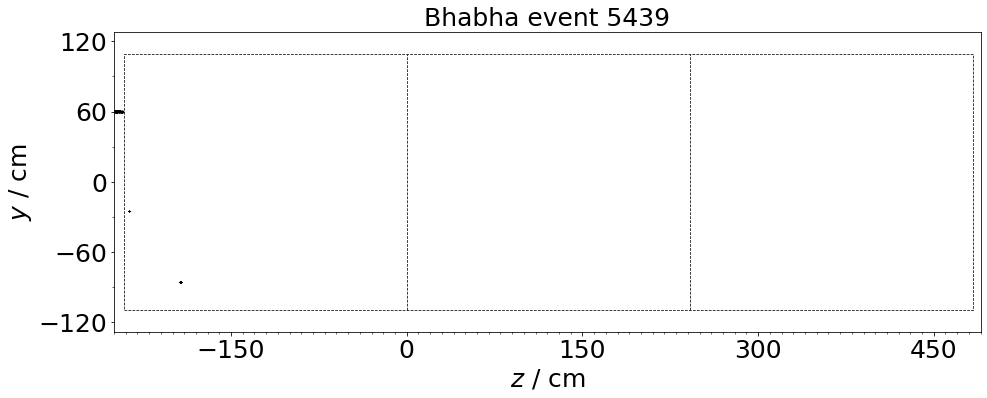

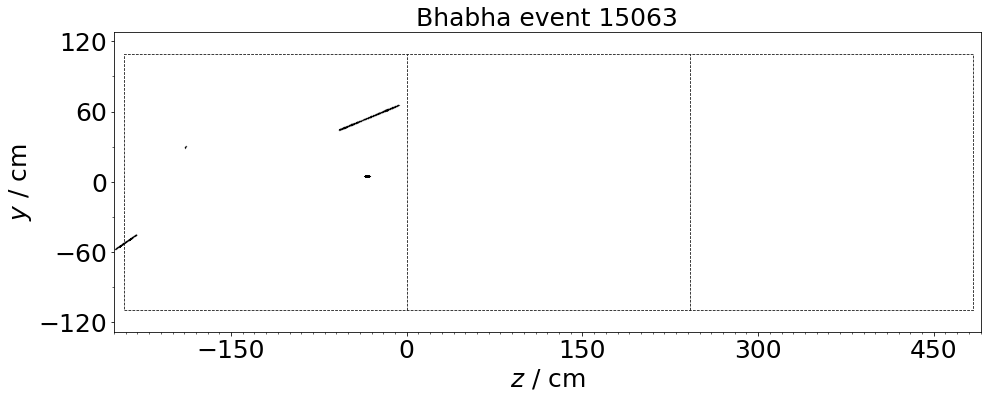

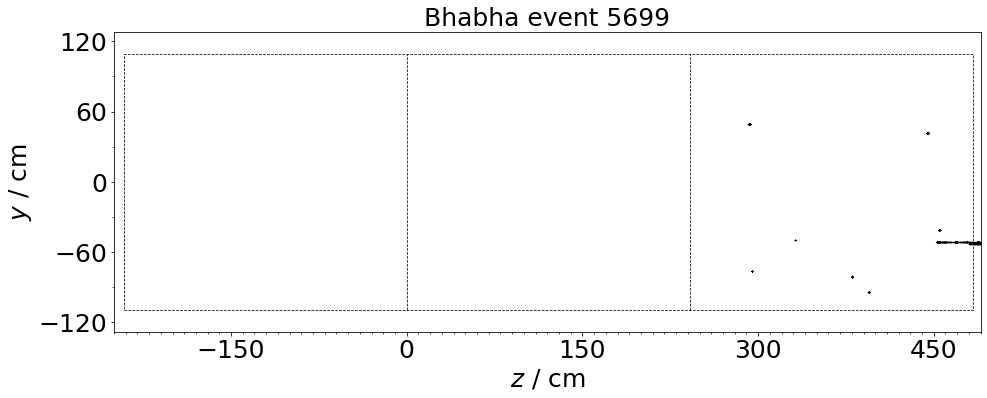

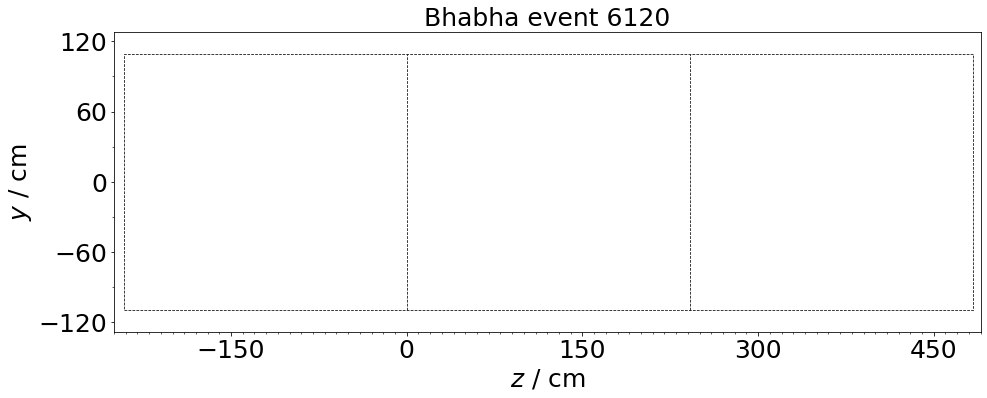

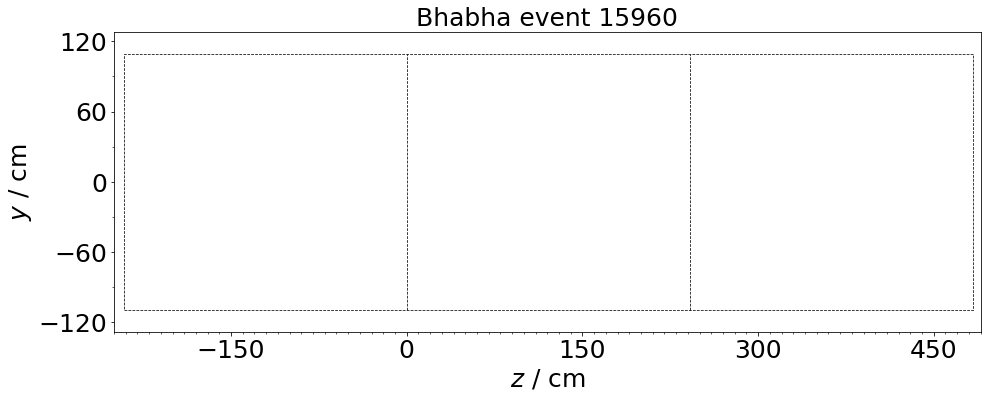

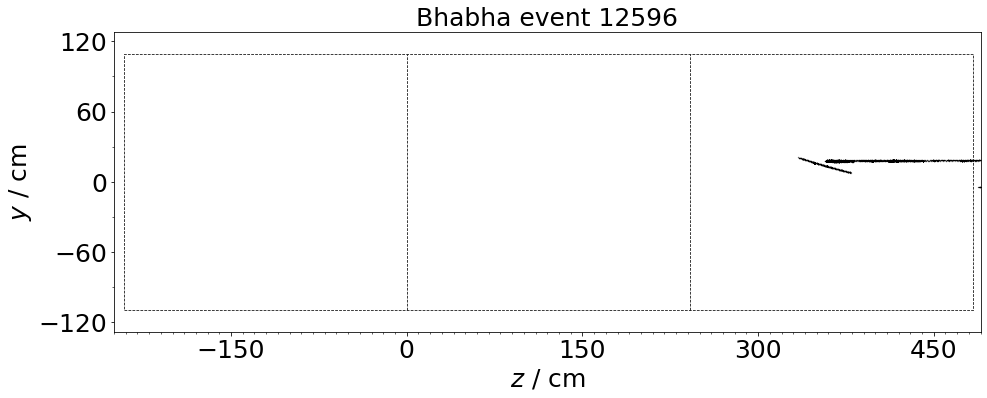

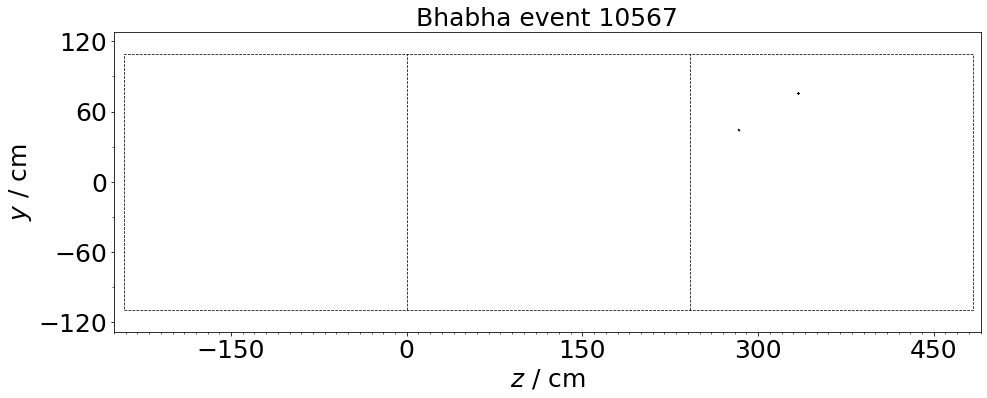

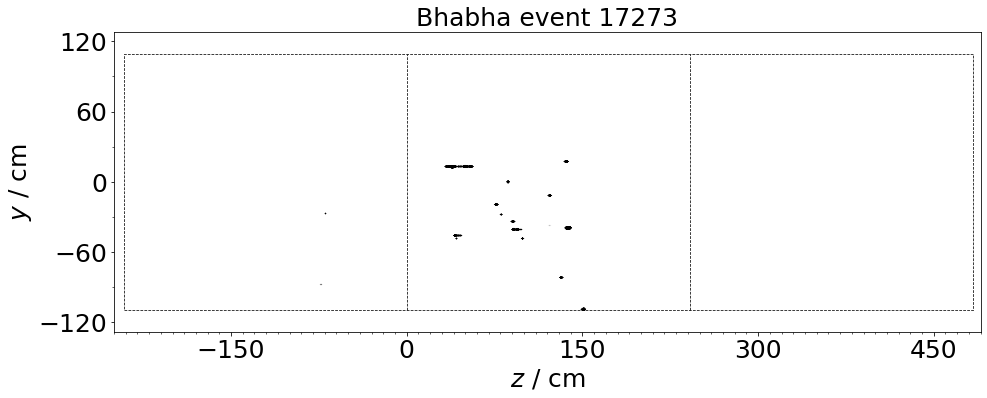

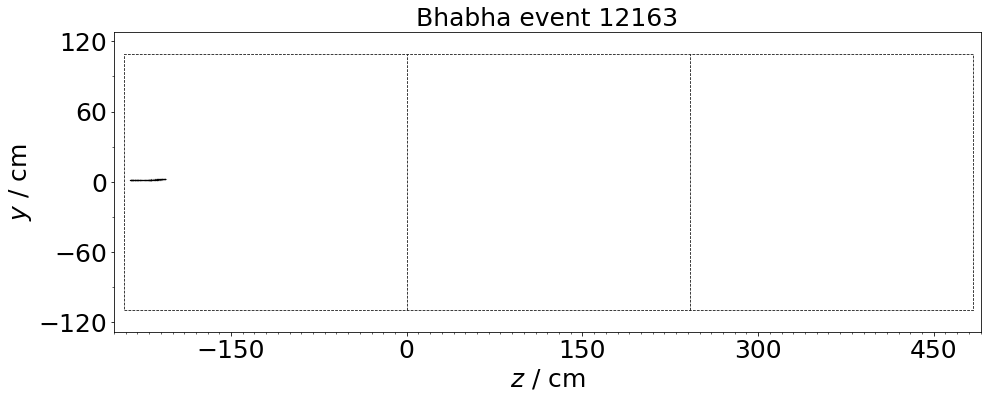

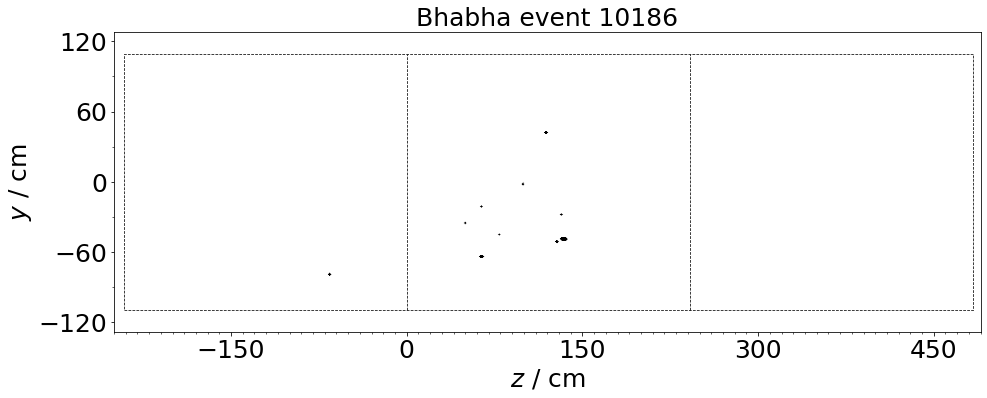

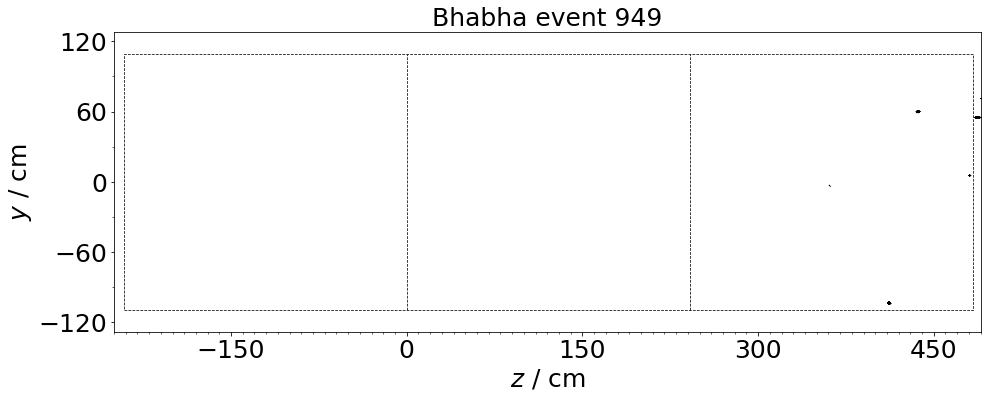

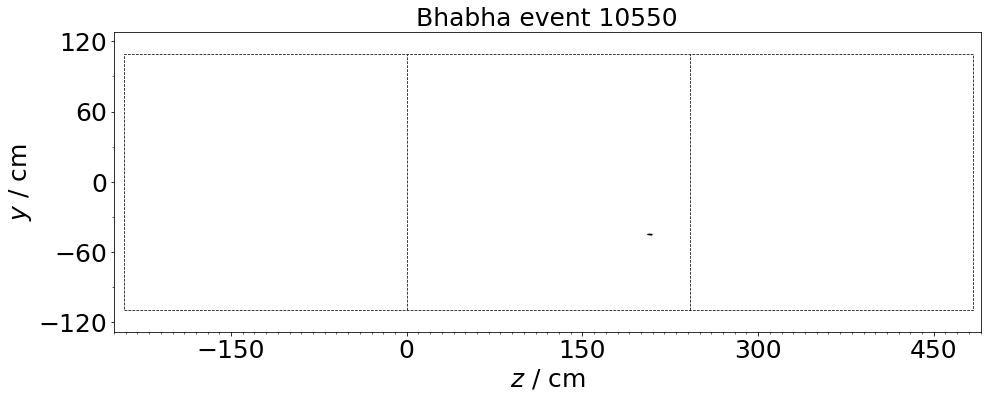

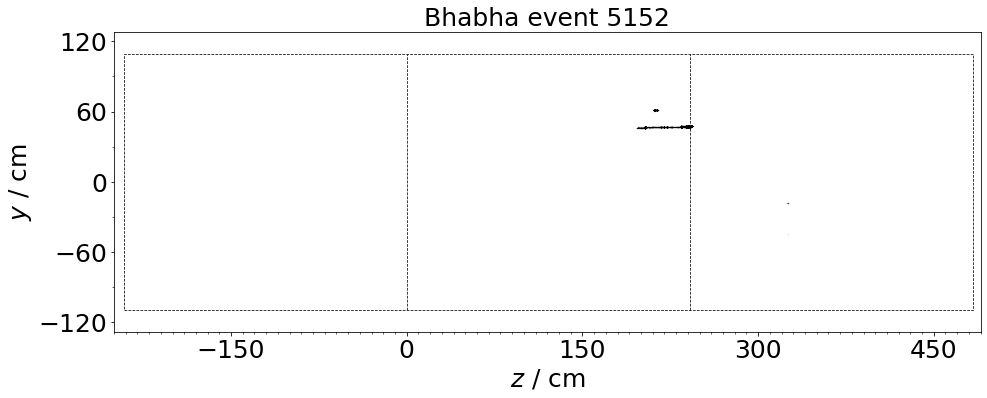

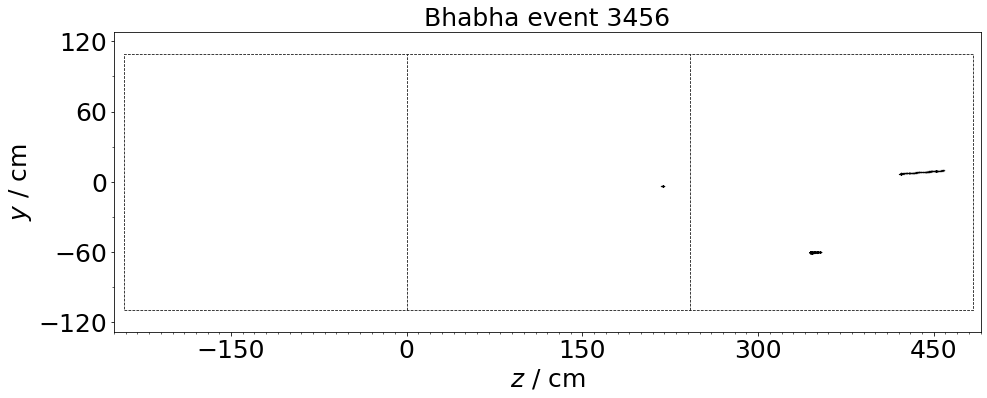

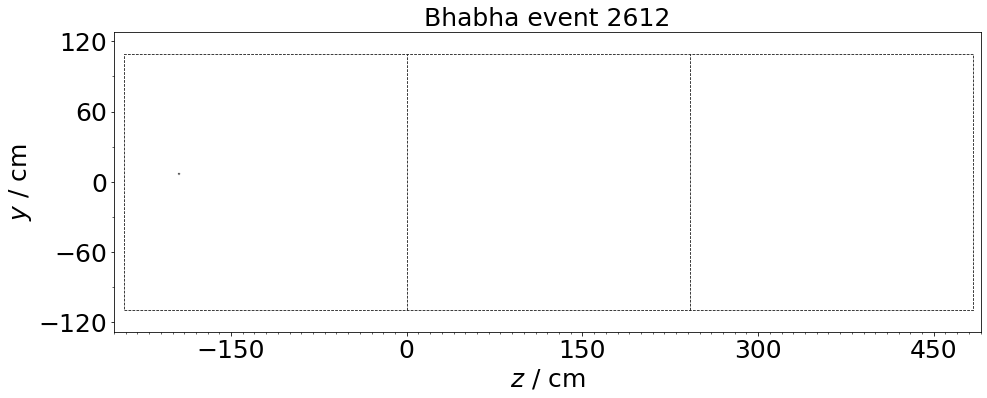

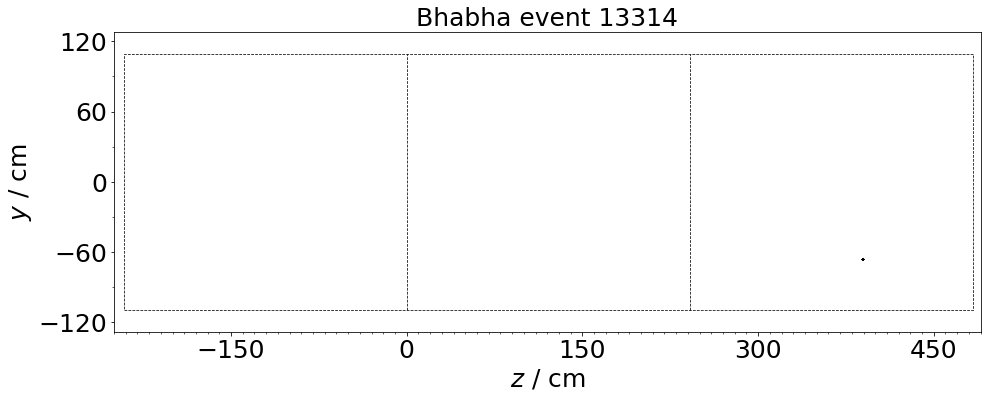

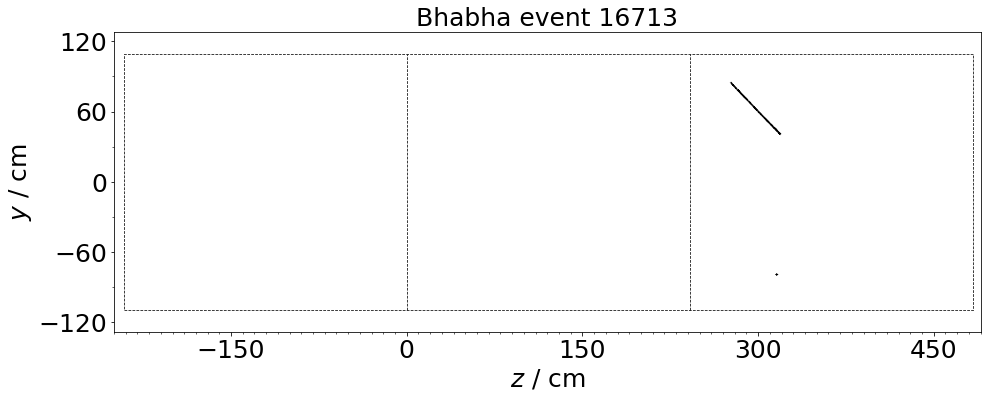

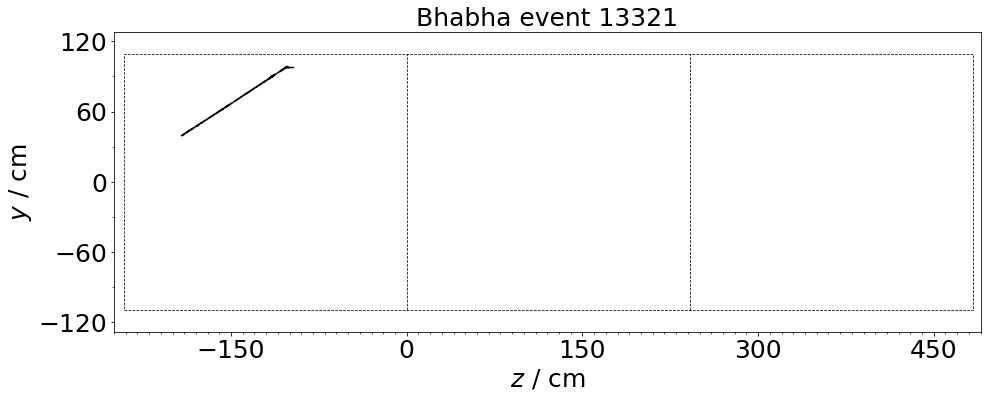

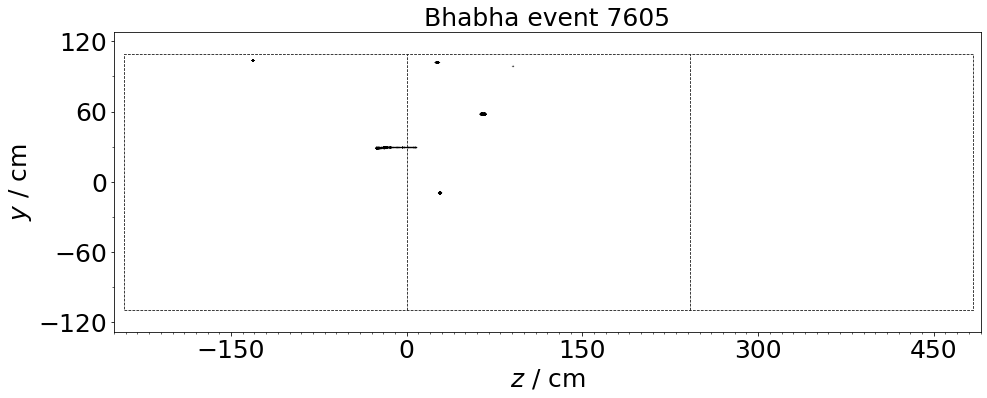

In [22]:
with PdfPages('bhabhaTest_events.pdf') as pdf:
    for i in bhabhaindices:
        
        data = Bhabhas[Bhabhas['eventIndex']==i]
        
        fig = bhabhaplot(data, i)
        pdf.savefig(fig)

## Counting tracks

In [23]:
TPCVolume = TPC[(TPC['z']>=0) & (TPC['z']<=241.69)]
TPCVolume

,x,y,z,eventID,eventIndex,trackID,pdg
0,3.210880,44.746375,115.245200,1,43,12,211
1,3.070951,44.823733,115.070009,1,43,12,211
2,3.163374,44.799451,114.736962,1,43,12,211
3,3.137874,44.908453,115.152055,1,43,12,211
4,3.287246,44.843614,115.455707,1,43,12,211
...,...,...,...,...,...,...,...
488391,-103.696168,5.191338,205.281205,10,957,5259,11
488392,-103.790639,5.371233,205.487557,10,957,5259,11
488393,-103.764573,5.334390,205.462420,10,957,5259,11
488394,-103.796809,5.269486,205.215976,10,957,5259,11


In [24]:
TPCUniqueTracks = TPCVolume.groupby(['eventID', 'eventIndex', 'trackID', 'pdg']).size().reset_index().rename(columns={0:'count'})
#TPCCutVolume = TPCCutVolume[TPCCutVolume['count']>=1000]
TPCUniqueTracks = TPCUniqueTracks[(TPCUniqueTracks['pdg'] != 11) | ((TPCUniqueTracks['pdg']==11) & (TPCUniqueTracks['eventID']==2) & (TPCUniqueTracks['trackID'] <=2)) | ((TPCUniqueTracks['pdg']==11) & (TPCUniqueTracks['eventID']!=2) & (TPCUniqueTracks['trackID'] <=4))]
TPCUniqueTracks

,eventID,eventIndex,trackID,pdg,count
0,1,43,4,-11,7025
1,1,43,9,-211,5536
2,1,43,11,-211,7863
3,1,43,12,211,6031
54,1,43,5678,-211,8014
55,1,43,5679,211,4451
60,1,43,5692,2212,56256
341,1,43,10324,-211,12940
342,1,43,12255,-11,6902
378,1,43,16021,-211,4065


In [25]:
for p in range(1,12):
    Tracktype = TPCUniqueTracks[TPCUniqueTracks['eventID']==p]
    print(len(Tracktype))

12
3
0
0
0
0
0
0
0
0
0


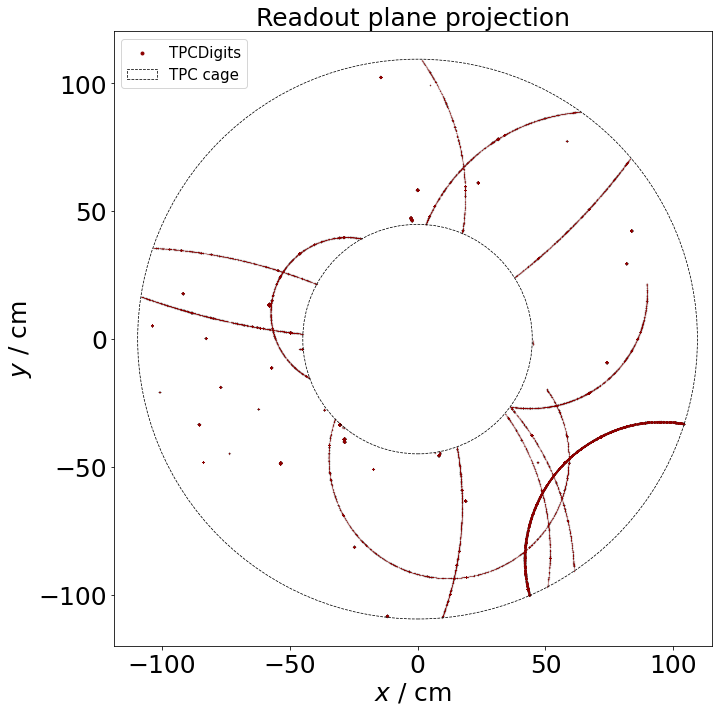

In [26]:
plot_xyprojection(TPCVolume['x'], TPCVolume['y'], hitcolor='darkred', hitlabel='TPCDigits', savebool=False, savename='UpsisForPeter.pdf')

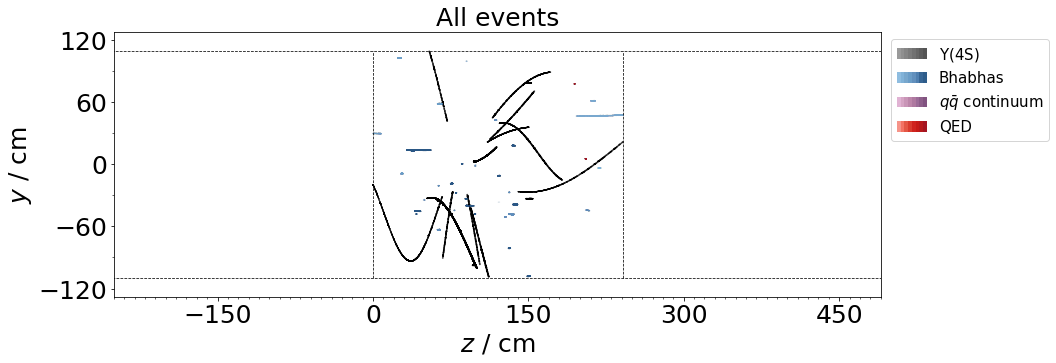

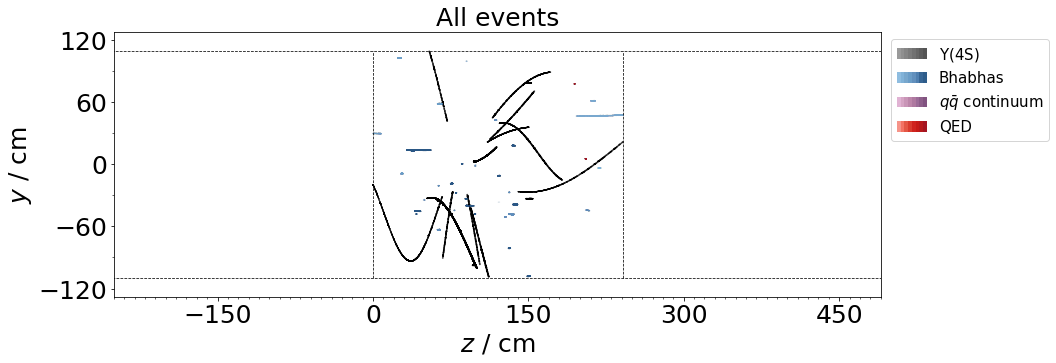

In [27]:
eventplot(TPCVolume, 0)

KeyError: 'z'

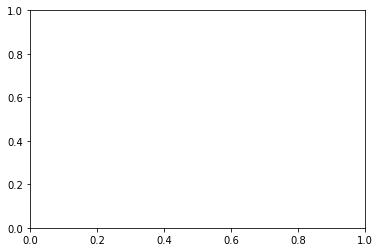

In [28]:
eventplot(TPCUniqueTracks, 0)

## Creating Numerous Displays

In [ ]:
#fig = eventplot(TPC, 0)
#fig.savefig('TestDisplay.png')

extensions = ('.root')
cut = 0
files = [f for f in os.listdir('dataTPC/') if os.path.isfile(os.path.join('dataTPC/', f))]
for f in files:
    ext = os.path.splitext(f)[-1].lower()
    if ext in extensions:
        seed = f[15:-5]
        f= 'dataTPC/'+f
        TPC = root_pandas.read_root(f, 'tree')
        fig = eventplot(TPC, 0)
        fig.savefig('dataTPC/displays/DisplayAll_'+seed+'.png')
        cut +=1
        #if cut > 20:
            #break


# Histogramming number of Hits

In [49]:
def count_tracks(filename):
    trackarray = []
    filename = '/gpfs/group/belle2/users/loeschca/ElectricField/dataTPCBkg5/'+filename
    TPC = root_pandas.read_root(filename, 'tree')
    TPC = TPC[(TPC['z']>=0) & (TPC['z']<=241.69)]
    origindex = TPC['eventIndex'][0]
    #print(origindex)
    #TPC = TPC[(TPC['eventIndex']!=origindex) & (TPC['eventID']!=1)]
    TPCUniqueTracks = TPC.groupby(['eventID', 'eventIndex', 'trackID', 'pdg']).size().reset_index().rename(columns={0:'count'})
    TPCUniqueTracks = TPCUniqueTracks[(TPCUniqueTracks['pdg'] != 11) | ((TPCUniqueTracks['pdg']==11) & (TPCUniqueTracks['eventID']==2) & (TPCUniqueTracks['trackID'] <=2)) | ((TPCUniqueTracks['pdg']==11) & (TPCUniqueTracks['eventID']!=2) & (TPCUniqueTracks['trackID'] <=4))]
    for p in range(1,12):
        Tracktype = TPCUniqueTracks[TPCUniqueTracks['eventID']==p]
        trackarray.append(len(Tracktype))
    return trackarray    

In [50]:


tracks = np.zeros(shape=(11,51))

#tracklist = count_tracks('dataTPC/TPCEventOverlay3825921711.root')
#tracklist
i=0

for f in os.listdir('/gpfs/group/belle2/users/loeschca/ElectricField/dataTPCBkg5'):
    tracklist = count_tracks(f)
    
    for j in range(0,11):
        tracks[j][i]=tracklist[j]
    i+=1
    
tracks[0][0]



5.0

In [51]:
tracks[0]

array([ 5., 11., 15., 10., 11.,  4., 14., 12., 10., 10., 10., 10., 15.,
       14., 14.,  9., 10., 10., 13.,  7.,  5., 18., 10., 10., 15., 15.,
       12.,  7.,  8., 15., 10., 12., 15., 22., 15., 11., 14., 10., 12.,
       13., 10., 14., 16., 13., 11., 19., 10., 22., 10.,  8.,  0.])

In [52]:
tracks[10][0]

1.0

In [53]:
maxtrax=np.amax(tracks)
maxtrax

22.0

In [54]:
bins = []
for i in range(int(np.amax(tracks))+1):
    bins.append(i - 0.5)
bins

[-0.5,
 0.5,
 1.5,
 2.5,
 3.5,
 4.5,
 5.5,
 6.5,
 7.5,
 8.5,
 9.5,
 10.5,
 11.5,
 12.5,
 13.5,
 14.5,
 15.5,
 16.5,
 17.5,
 18.5,
 19.5,
 20.5,
 21.5]

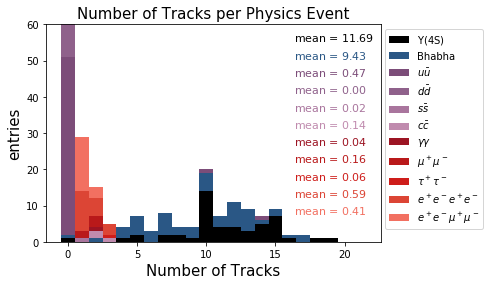

In [55]:
fig, ax = plt.subplots()
labels = [r'$\Upsilon$(4S)', 'Bhabha', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$']
colors = [(0.0, 0.0, 0.0), (0.165, 0.341, 0.522), (0.486, 0.302, 0.475), (0.561, 0.380, 0.545), (0.663, 0.459, 0.616), (0.753, 0.545, 0.682), (0.612, 0.078, 0.137), (0.725, 0.098, 0.102), (0.808, 0.114, 0.102), (0.863, 0.271, 0.208), (0.949, 0.439, 0.380)]
bins = []
for i in range(int(np.amax(tracks))+1):
    bins.append(i - 0.5)
n, axbins, patches = ax.hist([tracks[0], tracks[1], tracks[5], tracks[6], tracks[7], tracks[8], tracks[2], tracks[3], tracks[4], tracks[9], tracks[10]], bins=bins, stacked=True, label=labels, color=colors)

ax.set_xlabel(r'Number of Tracks', fontsize=15)
ax.set_ylabel('entries', fontsize=15)
ax.set_ylim(0, 60)

plt.figtext(.70, .82, r'mean = $%.2f$' % (tracks[0].mean()), fontsize=11, color=colors[0])
plt.figtext(.70, .76, r'mean = $%.2f$' % (tracks[1].mean()), fontsize=11, color=colors[1])
plt.figtext(.70, .70, r'mean = $%.2f$' % (tracks[5].mean()), fontsize=11, color=colors[2])
plt.figtext(.70, .64, r'mean = $%.2f$' % (tracks[6].mean()), fontsize=11, color=colors[3])
plt.figtext(.70, .58, r'mean = $%.2f$' % (tracks[7].mean()), fontsize=11, color=colors[4])
plt.figtext(.70, .52, r'mean = $%.2f$' % (tracks[8].mean()), fontsize=11, color=colors[5])
plt.figtext(.70, .46, r'mean = $%.2f$' % (tracks[2].mean()), fontsize=11, color=colors[6])
plt.figtext(.70, .40, r'mean = $%.2f$' % (tracks[3].mean()), fontsize=11, color=colors[7])
plt.figtext(.70, .34, r'mean = $%.2f$' % (tracks[4].mean()), fontsize=11, color=colors[8])
plt.figtext(.70, .28, r'mean = $%.2f$' % (tracks[9].mean()), fontsize=11, color=colors[9])
plt.figtext(.70, .22, r'mean = $%.2f$' % (tracks[10].mean()), fontsize=11, color=colors[10])


plt.title('Number of Tracks per Physics Event', fontsize=15)

handles, labels = ax.get_legend_handles_labels()
lgnd = ax.legend(handles, labels, bbox_to_anchor=(1.32, 1))
#fig.tight_layout()

plt.savefig('physicstracks_new_upsi.pdf',bbox_extra_artists=(lgnd,), bbox_inches='tight')

In [ ]:
alltracks = np.zeros(101, dtype=int)
unwantedtracks = np.zeros(101, dtype=int)
for i in range(101):
    for j in range(11):
        alltracks[i]+=tracks[j][i]
        if j!=0:
            unwantedtracks[i] += tracks[j][i]


In [ ]:
unwantedtracks

In [ ]:
def plt_hist(axis, data, bins, color, hatch, label):
            counts, edges = np.histogram(data, bins=bins)
            edges = np.repeat(edges, 2)
            hist = np.hstack((0, np.repeat(counts, 2), 0))

            outline, = ax.plot(edges, hist, linewidth=1, color=color)
            axis.fill_between(edges, hist, 0,
                              edgecolor=outline.get_color(), hatch=hatch, label=label,
                              facecolor='none')  # < removes facecolor
            axis.set_ylim(0, None, auto=True)
            

fig, ax = plt.subplots()
labels = [r'$\Upsilon$(4S)', 'Bhabha', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$']
colors = [(0.0, 0.0, 0.0), (0.165, 0.341, 0.522), (0.486, 0.302, 0.475), (0.561, 0.380, 0.545), (0.663, 0.459, 0.616), (0.753, 0.545, 0.682), (0.612, 0.078, 0.137), (0.725, 0.098, 0.102), (0.808, 0.114, 0.102), (0.863, 0.271, 0.208), (0.949, 0.439, 0.380)]
bins = []
for i in range(int(np.amax(alltracks))+1):
    bins.append(i - 0.5)
    
plt_hist(ax, alltracks, bins, 'blue', r'\ \ \ \ ', 'All Tracks')
plt_hist(ax, unwantedtracks, bins, 'darkred', '////', r'Non-$\Upsilon$(4S) Tracks')
#n, axbins, patches = ax.hist([alltracks, unwantedtracks], bins=bins, )

ax.set_xlabel(r'Number of Tracks', fontsize=15)
ax.set_ylabel('entries', fontsize=15)


plt.figtext(.64, .59, r'mean = $%.2f$' % (alltracks.mean()), fontsize=12, color='blue')
plt.figtext(.3, .83, r'mean = $%.2f$' % (unwantedtracks.mean()), fontsize=12, color='darkred')

plt.title('Sum of Tracks per TPC Volume', fontsize=15)

plt.legend()
fig.tight_layout()
plt.savefig('sumtracks.pdf')

# Number of hits in Cells (2x2x2 cm^3)

In [ ]:
file = uproot.open("dataUpsilon4Ss.root")
tree = file["tree"]

In [ ]:
U4S = pd.DataFrame({subbranch: tree[f"TPCSimHits.{subbranch}"].array().content for subbranch in ["m_pdg", "m_x", "m_y", "m_z", "m_trackID"]})
U4S

In [ ]:
U4S['cellID'] = ((U4S['m_x']+128)/2).astype(int) + 128*((U4S['m_y']+128)/2).astype(int) + 128*128*((U4S['m_z']+83.12)/2).astype(int)
U4S

In [ ]:
U4S_BadCells = U4S.groupby(['cellID']).size().reset_index().rename(columns={0:'count'})
U4S_BadCells = U4S_BadCells[U4S_BadCells['count'] > 1000]
U4S_BadCells

In [ ]:
U4S_BadHits = U4S[U4S['cellID'].isin(U4S_BadCells['cellID'])]
U4S_BadHits

In [ ]:
U4S_BadPDGs = U4S_BadHits.groupby(['m_trackID', 'm_pdg']).size().reset_index().rename(columns={0:'count'})
U4S_BadPDGs

In [ ]:
plot_sideprojection(U4S_BadHits['m_z'], U4S_BadHits['m_y'], sidename='y', hitcolor='blue', hitlabel='TPCSimHits', savebool=False, savename='UpsisForPeter.pdf', sidelimlow=-128, sidelimup=128)#, zlimlow=-83.12, zlimup=158.57)

In [ ]:
U4S_BadCellsTest = U4S_BadHits.groupby(['cellID']).size().reset_index().rename(columns={0:'count'})
U4S_BadCellsTest